# Directing Customers to App Subscription through App Behaviour Analysis 

__Description__:
We are working for a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. The company as a result launches a free version of the app to attract and trial users. 

The task given is to identify which users will most likely NOT enroll in the paid product, so that additional offers can be given to them. Due to the cost of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.

__Market__:
- The target audience is customers who use a company's free product. These are the users who have installed the free version of the app.

__Product__: 
- The paid memberships often provide enhanced version of the free version. E.g. Youtube Red allows to listen to video even upon leaving the app.

__Goal__: 
- Predict which users are unlikely to subscribe to the paid membership, so that marketing can be done efficiently in order to try to convert them into paid users. 

__Data__:
- The app usage data is only from the user's first day in the app. This limitation exists because there is a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trial is over.



# Importing Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [4]:
data = pd.read_csv('appdata10.csv')

### EDA

In [6]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [7]:
data.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [11]:
data.shape

(50000, 12)

In [12]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


We can see that the average age of the user is 31, 10% of the users have played the minigame with 17% using the premium features. We can also see that 62% have enrolled onto the premium version.

We can see that the hour column is of a string type hence why it is not shown in the description of the dataset.
So we shall convert it into a suitable datatype. 

In [16]:
data['hour'] = data.hour.str.slice(1, 3).astype(int)

# Visualisation

In [22]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [23]:
#Removing Columns which are not useful
data2 = data.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [27]:
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [32]:
data2.shape

(50000, 7)

### Plotting a Histogram

<Figure size 432x288 with 0 Axes>

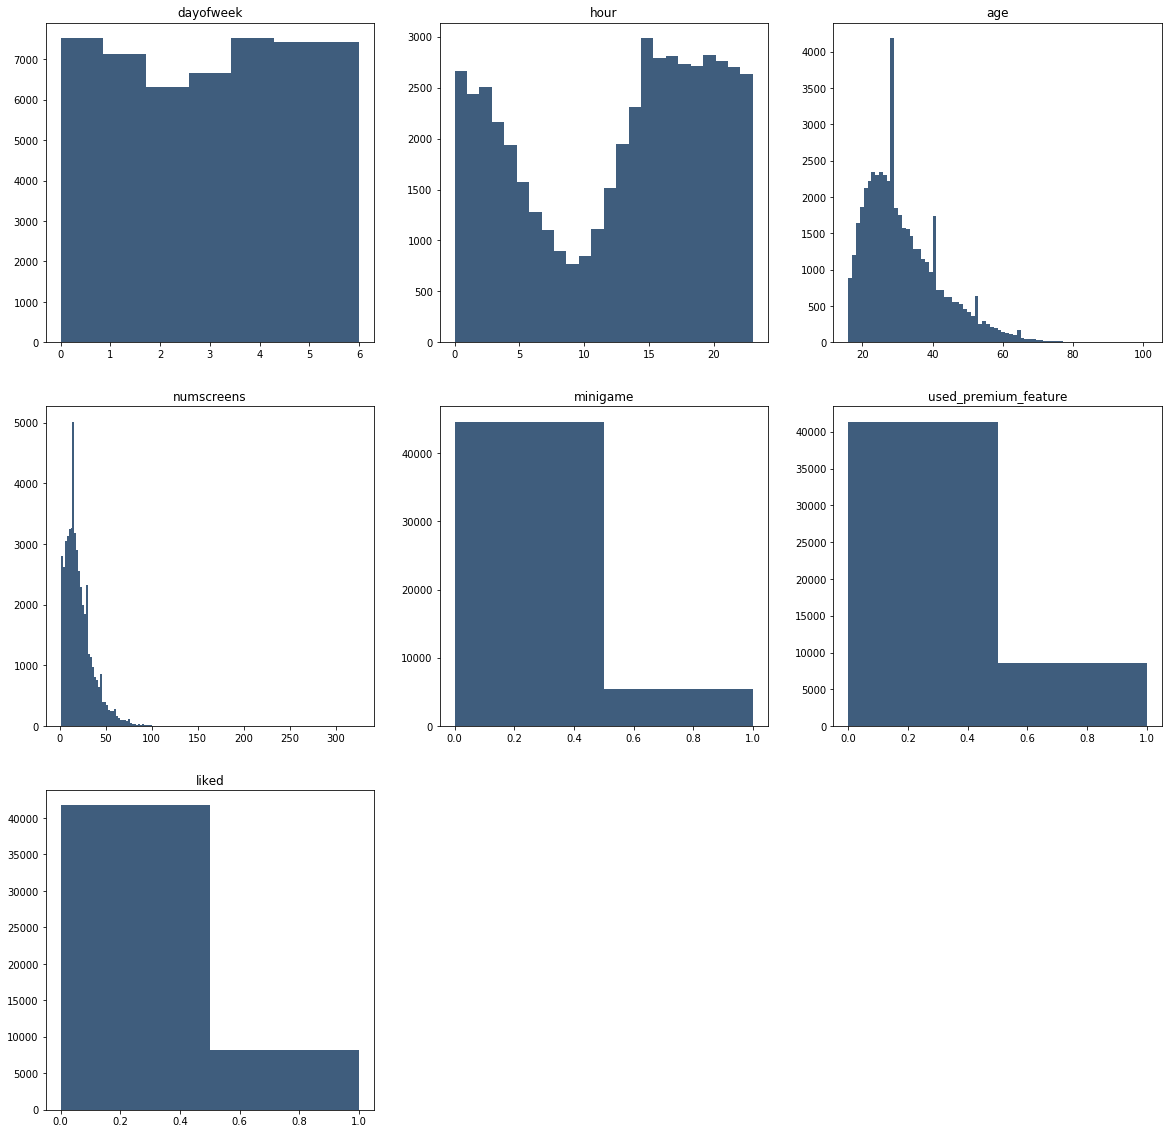

In [52]:
plt.suptitle("Histogram of Numerical Colmns", fontsize = 20)
plt.figure(figsize = (20, 20))
for i in range(1, data2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(data2.columns.values[i-1])
    
    num_of_bins = np.size(data2.iloc[:, i - 1].unique())
    
    plt.hist(data2.iloc[:, i - 1], bins = num_of_bins, color = '#3F5D7D')

__Summary of the Plots__

__Days of the Week__:
We can see that the distribution is pretty even. No particular day that influences the installation of the app.

__Hours__:
The time is UTC so since the data for a company in PST time, the dip can be relatable as it will be very late at night so there will be few users on the app.

__Age__:
The distribution for age seems pretty even too with some spikes at age ~34-35 and at 41.

__Number of Screens__:
Pretty evenly distributed as well with some outliers.

__Minigame, Used Premium Features and Liked__:
The first bar of the chart can be assigned at 0 and the latter being at 1. 
Most people have not played the minigame we can assume from the chart.
Similar scenario to Premium features and the number of users who liked the app.


### Plotting a Correlation Chart

We need to know the influence of the features on the target variable.

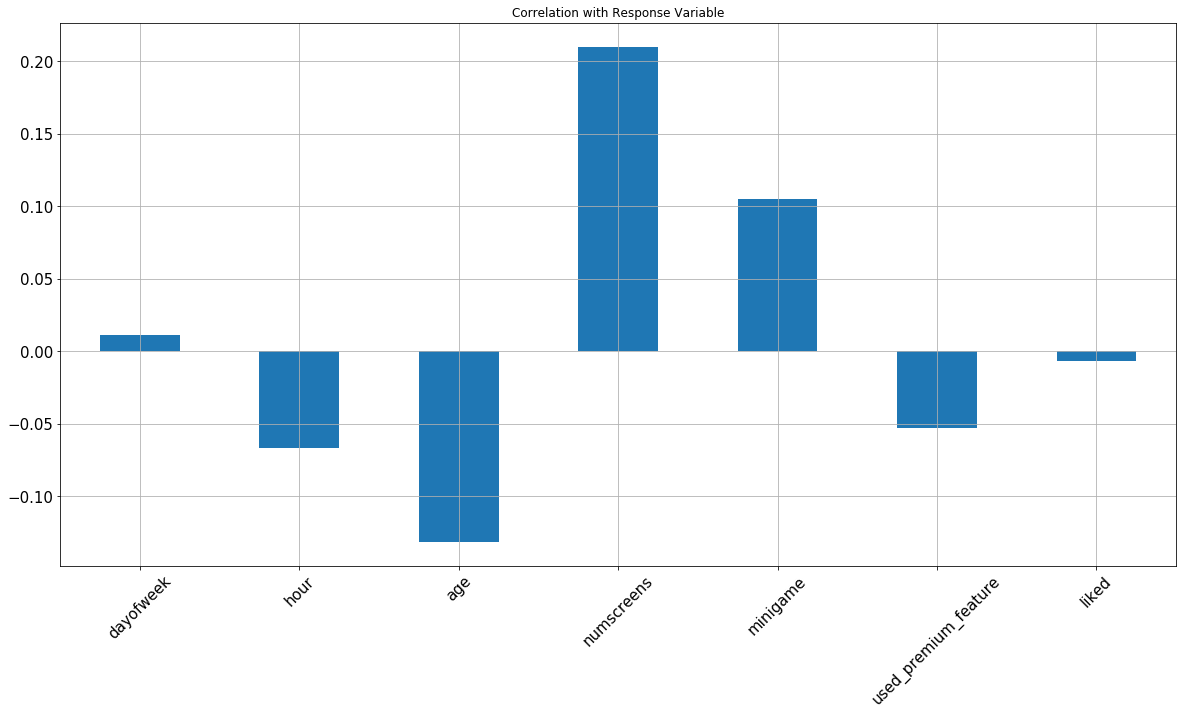

In [54]:
data2.corrwith(data.enrolled).plot.bar(figsize = (20, 10),
                                         title = 'Correlation with Response Variable',
                                         fontsize = 15, rot = 45,
                                         grid = True)

__Summary of the Correlation Plot__:

__Days of the Week__: This variable has negligible correlation to the response variable.

__Hour__: It is negatively correlated therefore more users are likely to be enrolled earlier on the day.

__Age__: Negatively correlated therefore highly likely that younger audience would enroll on the premium version of the app. It make sense since younger people are more inclined towards phone technology.

__Number of Screens__: The more screens the users have seen, users are likely to be more engaged with the app therefore higher enrolling chance.

__Minigame__: The more minigames the user has played, the more likely they are to enroll onto the premium version of the app.

__Used Premium Features__: It shows that if the user has already known or used the premium features, they are less likely to enroll as it may not convince them enough.

__Liked__: It has negligible correlation therefore not much useful.

### Plotting Correlation Matrix

We aim that features are independent variables from each other.

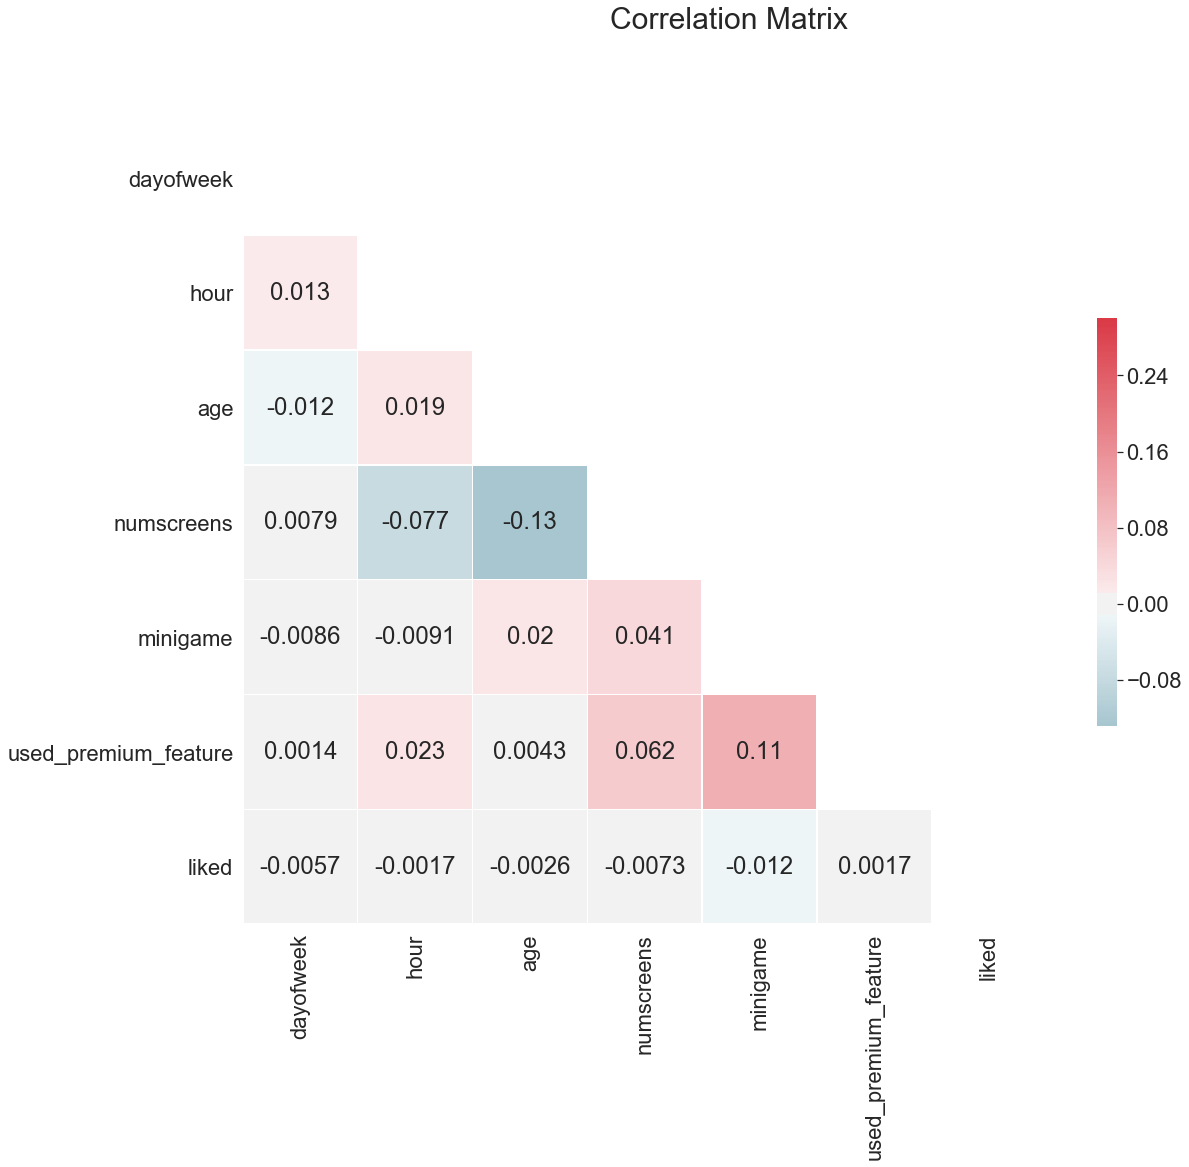

In [64]:
sns.set(style = 'white', font_scale = 2)

#Computing the Matrix
corr = data2.corr()

#Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Setting up the matplotlib figure
fig, axes = plt.subplots(figsize=(18, 15))
fig.suptitle("Correlation Matrix", fontsize = 30)

#Generating a custom diverging colourmap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#Plotting the heatmap with the mask
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3,
           center = 0, square = True, linewidths = 0.5,
           cbar_kws = {"shrink": 0.5}, annot = True)

__Summary of Confusion Matrix__:

# Feature Engineering

In [65]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

Converting Dates and hours to a date time object 

In [68]:
data["first_open"] = [parser.parse(row_data) for row_data in data["first_open"]] #from datautil

In [71]:
data["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in data["enrolled_date"]]

In [72]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [74]:
data["difference"] = ((data.enrolled_date) - (data.first_open)).astype('timedelta64[h]')

### Selecting the best time/hour as a cutoff for the response variable

<function matplotlib.pyplot.show(*args, **kw)>

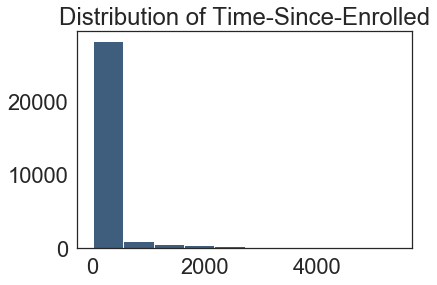

In [76]:
plt.hist(data["difference"].dropna(), color = '#3F5D7D')
plt.title("Distribution of Time-Since-Enrolled")
plt.show

__Summary of the Distribution Plot__:

We can see the distribution being left skewed meaning that enrollment happens in the first 500 hours. 
As an alternative it could very well be that the enrollment can occur within the first 50 hours so
we need to refine the data further in order to pick the best hour of enrollment

<function matplotlib.pyplot.show(*args, **kw)>

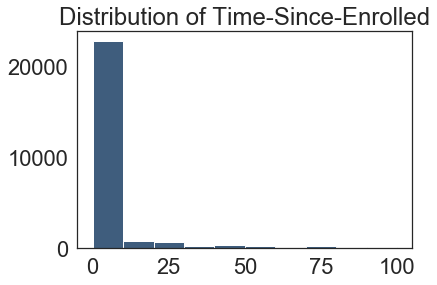

In [78]:
plt.hist(data["difference"].dropna(), color = '#3F5D7D', range = [0, 100])
plt.title("Distribution of Time-Since-Enrolled")
plt.show

We can see that the enrollment seems to be happening in the first 10 - 20 hours so we will focus on the first 48 hours as it completes it to two full days worth of enrollment.

In [79]:
#Imputing zeros to all the rows which are above 48 hour mark
data.loc[data.difference > 48, 'enrolled'] = 0

In [80]:
data = data.drop(columns = ['difference', 'enrolled_date', 'first_open'])

__Furthermore, we will utilise the best screens in use from the app by the users__

In [81]:
top_screens_data = pd.read_csv("top_screens.csv").top_screens.values

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [83]:
data["screen_list"] = data.screen_list.astype(str) + ','

for screen in top_screens_data:
    data[screen] = data.screen_list.str.contains(screen).astype(int)
    data["screen_list"] = data.screen_list.str.replace(screen + ",", "")

In [85]:
data["Other"] = data.screen_list.str.count(",")

In [86]:
data = data.drop(columns = ["screen_list"])

### Funnels: 

Group of Screens that belong to the same set as there are many screens which are correlated with each other. So we need to group all the screens into one funnel. If they belong to that one funnel, then it becomes a column of how many screens it contains and remove the correlation

#### Savings Screens

In [89]:
savings_screens = ["Saving1",
                 "Saving2",
                 "Saving2Amount",
                 "Saving4",
                 "Saving5",
                 "Saving6",
                 "Saving7",
                 "Saving8",
                 "Saving9",
                 "Saving10"]

In [90]:
data["SavingsCount"] = data[savings_screens].sum(axis = 1)

In [91]:
data = data.drop(columns = savings_screens)

#### CM Screens

In [92]:
cm_screens = ["Credit1",
             "Credit2",
             "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]

In [94]:
data["CMCount"] = data[cm_screens].sum(axis = 1)

In [95]:
data = data.drop(columns=cm_screens)

#### CC Screens

In [98]:
cc_screens = ["CC1",
             "CC1Category",
             "CC3"]

In [100]:
data["CCCount"] = data[cc_screens].sum(axis = 1)

In [101]:
data = data.drop(columns=cc_screens)

#### Loan Screens

In [102]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]

In [104]:
data["LoansCount"] = data[loan_screens].sum(axis=1)

In [105]:
data = data.drop(columns=loan_screens)

In [109]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


#### Exporting the dataset to a new file

In [111]:
data.to_csv("new_appdata_self.csv", index = False)